In [1]:

appl_df<-read.csv("R_preprocessed_appl_stock_prices.csv")

In [2]:
appl_df <- appl_df[, c('Open','High','Low','Volume','Moving.Average.7','Moving.Average.14','Close')]

In [3]:
summary(appl_df)

      Open                High                Low           
 Min.   :  0.04967   Min.   :  0.04967   Min.   :  0.04911  
 1st Qu.:  0.29576   1st Qu.:  0.30246   1st Qu.:  0.28795  
 Median :  0.51116   Median :  0.52009   Median :  0.50310  
 Mean   : 20.08192   Mean   : 20.30179   Mean   : 19.87053  
 3rd Qu.: 18.92482   3rd Qu.: 19.06116   3rd Qu.: 18.73277  
 Max.   :198.02000   Max.   :199.62000   Max.   :197.00000  
     Volume          Moving.Average.7   Moving.Average.14       Close          
 Min.   :0.000e+00   Min.   :  0.0519   Min.   :  0.05457   Min.   :  0.04911  
 1st Qu.:1.163e+08   1st Qu.:  0.2966   1st Qu.:  0.29642   1st Qu.:  0.29618  
 Median :2.092e+08   Median :  0.5108   Median :  0.51076   Median :  0.51172  
 Mean   :3.217e+08   Mean   : 20.0420   Mean   : 19.97902   Mean   : 20.09544  
 3rd Qu.:4.017e+08   3rd Qu.: 18.9275   3rd Qu.: 18.90541   3rd Qu.: 18.94054  
 Max.   :7.422e+09   Max.   :196.5729   Max.   :195.26072   Max.   :198.11000  

In [4]:
str(appl_df)

'data.frame':	10840 obs. of  7 variables:
 $ Open             : num  0.154 0.151 0.145 0.138 0.136 ...
 $ High             : num  0.155 0.151 0.145 0.138 0.136 ...
 $ Low              : num  0.154 0.151 0.144 0.138 0.135 ...
 $ Volume           : num  21660800 35728000 45158400 55686400 39827200 ...
 $ Moving.Average.7 : num  0.152 0.154 0.154 0.151 0.147 ...
 $ Moving.Average.14: num  0.137 0.139 0.14 0.142 0.144 ...
 $ Close            : num  0.154 0.151 0.144 0.138 0.135 ...


In [5]:
set.seed(42)
total_rows <-nrow(appl_df)
train_indices<-sample(1:total_rows, size = floor(0.7 * total_rows))
train_data<-appl_df[train_indices, ]
test_data<-appl_df[-train_indices, ]

In [6]:
lm_model <-lm(Close ~ ., data = train_data)

summary(lm_model)



Call:
lm(formula = Close ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0333 -0.0060 -0.0002  0.0041  4.0185 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -9.524e-04  5.420e-03  -0.176    0.861    
Open              -6.247e-01  9.827e-03 -63.571   <2e-16 ***
High               8.111e-01  8.751e-03  92.692   <2e-16 ***
Low                8.107e-01  8.251e-03  98.259   <2e-16 ***
Volume             6.041e-12  1.057e-11   0.572    0.568    
Moving.Average.7   6.547e-03  7.485e-03   0.875    0.382    
Moving.Average.14 -3.389e-03  4.616e-03  -0.734    0.463    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3022 on 7580 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 2.406e+07 on 6 and 7580 DF,  p-value: < 2.2e-16


In [7]:
predictions_lm <-predict(lm_model, test_data)

# MSE
mse_lm <- mean((predictions_lm - test_data$Close)^2)
print(paste("MSE for multiple Linear regression:", mse_lm))

[1] "MSE for multiple Linear regression: 0.0919316717648506"


In [8]:
#  R-squared of testinf set

ss_res <-sum((predictions_lm - test_data$Close)^2)
ss_tot <-sum((test_data$Close - mean(test_data$Close))^2)
r_squared_lm <- 1 - (ss_res / ss_tot)
print(paste("R-squared for multiple linear regression:", r_squared_lm))

[1] "R-squared for multiple linear regression: 0.999949607573769"


In [9]:
library(Metrics)

#  RMSE
rmse_lm<- sqrt(mse_lm)
#  MAE
mae_lm<- mae(test_data$Close,predictions_lm)

print(paste("Root Mean Squared Error (RMSE):", rmse_lm))
print(paste("Mean Absolute Error (MAE):", mae_lm))

Warning message:
"package 'Metrics' was built under R version 4.3.3"


[1] "Root Mean Squared Error (RMSE): 0.3032023610806"
[1] "Mean Absolute Error (MAE): 0.0950675664571641"


Warning message:
"package 'ggplot2' was built under R version 4.3.3"
`geom_smooth()` using formula = 'y ~ x'


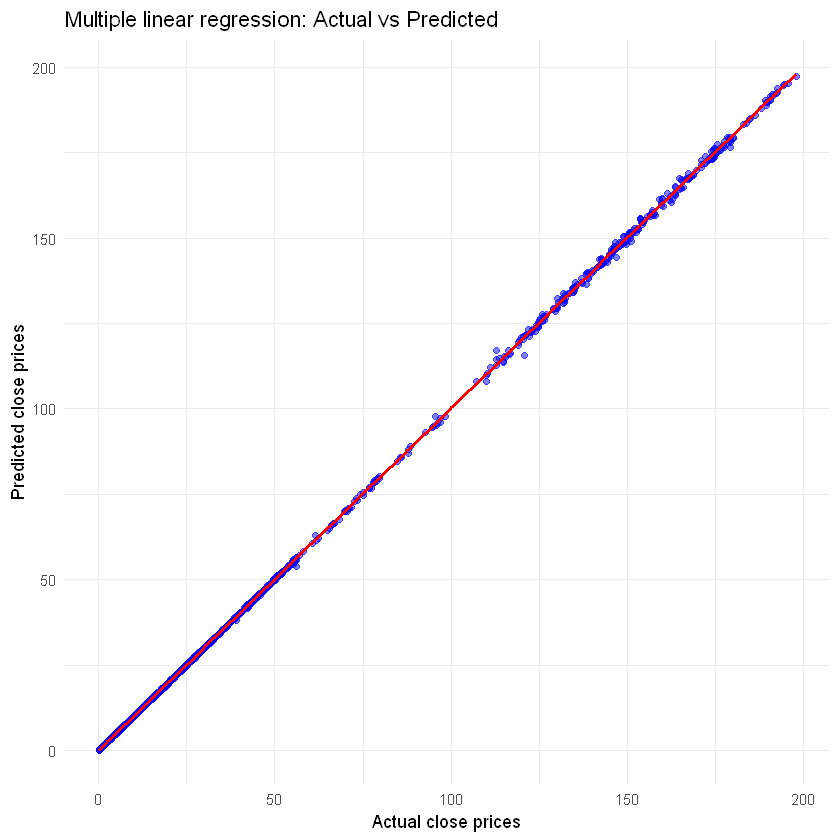

In [10]:
library(ggplot2)
results_lm <- data.frame(Actual = test_data$Close, Predicted = predictions_lm)
ggplot(results_lm, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.5,color = 'blue') +
  geom_smooth(method = "lm", color = "red") +
  ggtitle("Multiple linear regression: Actual vs Predicted") +
  xlab("Actual close prices") +
  ylab("Predicted close prices") +
  theme_minimal()
